# Additional exploration with Cats & Dogs

### Exploring Weight Initialization

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = 'cats_dogs_data'

train_dir = os.path.join(base_dir,'seg_train')
valid_dir = os.path.join(base_dir,'seg_test')
test_dir = os.path.join(base_dir,'seg_pred')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 6,
                                                   class_mode = 'categorical',
                                                   shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size = (150,150),
                                                   batch_size = 6,
                                                   class_mode = 'categorical',
                                                  shuffle=True)

for data_batch, labels_batch in train_generator:
    print('db shape', data_batch.shape)
    print('lb shape', labels_batch.shape)
    break

Using TensorFlow backend.


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
db shape (6, 150, 150, 3)
lb shape (6, 6)


### Learning rate

It is apparent from the loss plots for the models above that the learning rate flattens after about 15 iterations. For this purpose, the following options will be explored using the SGD + momentum model:
- multiple learning rates
- learning rate decay

In [2]:
import matplotlib.pyplot as plt
from keras import layers, models, optimizers

# Exploring learning rate values for the second model's architecture (using SGD + momentum optimizer)

def build_model_lr(lrate): 
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(6,activation = 'softmax'))

    #model.summary()
    model.compile(loss='categorical_crossentropy',
             optimizer = optimizers.SGD(lr=lrate,momentum=0.9),
             metrics=['acc'])
    
    return model

l_rate = [0.1,0.01,0.001,.0001]

for i in range(len(l_rate)):
    #plot_num = 420+i+1
    plt.figure()
    m_lr = build_model_lr(l_rate[i]) 
    history = m_lr.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 40,
                                 validation_data = valid_generator,
                                 validation_steps = 100, verbose=0)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs,acc, 'b', label='Train accuracy')
    plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
    plt.title('Accuracy w/ l rate ='+str(l_rate[i]), pad=50)
    plt.legend()



    plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

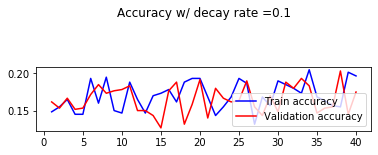

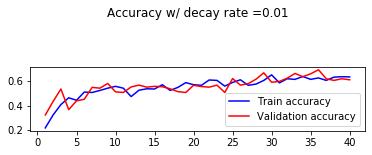

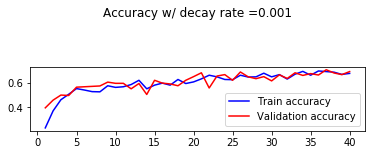

In [10]:
import matplotlib.pyplot as plt
from keras import layers, models, optimizers

# Exploring learning decay for the second model's architecture (using SGD + momentum optimizer)

def build_model_decay(lrate, decay): 
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(6,activation = 'softmax'))

    #model.summary()
    model.compile(loss='categorical_crossentropy',
             optimizer = optimizers.SGD(lr=lrate,momentum=0.9,decay=decay),
             metrics=['acc'])
    
    return model

decay_rate = [0.1,0.01,0.001]

for i in range(len(decay_rate)):
    plot_num = 310+i+1
    plt.subplot(plot_num)
    m_lr = build_model_decay(decay_rate[i],0.0001) # learning rate fixed at 0.0001
    history = m_lr.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 40,
                                 validation_data = valid_generator,
                                 validation_steps = 100, verbose=0)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs,acc, 'b', label='Train accuracy')
    plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
    plt.title('Accuracy w/ decay rate ='+str(decay_rate[i]), pad=50)
    plt.legend()



    plt.show()


### Data Augmentation & DropOut
The above model is overfit as shown by the huge gap between training & validation accuracy and inconsistent validation loss. The solution would be to apply data augmentation & add dropout to the model

In [ ]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')


In [ ]:
# New model with dropout
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.Adam(lr=1e-04,beta_1=0.9, beta_2=0.999),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 50,
                             validation_data = valid_generator,
                             validation_steps = 50)
model.save('cd_drop_aug.h5')


In [ ]:
hist_dump = open('cd_dropAug_HistoryDict.pickle', 'wb')
pickle.dump(history.history, hist_dump)
hist_dump.close()

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'b', label='Train accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation accuracy')
plt.title('New Model Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'b', label="Train loss")
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('New Model Training & Validation Loss')
plt.legend()

plt.show()

## Visualizing 

In [ ]:
# Import test data

import os, shutil
full_image_dir = 'cats_dogs_data/full'
base_dir = 'cats_dogs_data'

cats_test_dir = os.path.join(os.path.join(base_dir,'test'),'cats')
dogs_test_dir = os.path.join(os.path.join(base_dir,'test'),'dogs')

    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(cats_test_dir,fname)
    shutil.copyfile(src,dest)

    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(full_image_dir,fname)
    dest = os.path.join(dogs_test_dir,fname)
    shutil.copyfile(src,dest)


In [ ]:
# import example image for channel activation map visualization
img_path = 'cats_dogs_data/test/dogs/dog.1512.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras.models import load_model 
from keras import models

m2 = load_model('cd_drop_aug.h5')
layer_outputs = [layer.output for layer in m2.layers[:8]]
activation_model = models.Model(inputs=m2.input, output=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = []
for layer in m2.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize = (scale*display_grid.shape[1],
                         scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

Each channel extracts specific features from the images. Channel 4 (fourth column images) highlights that the channel can identify eyes. Channel 3, 5 seems to be identifying lines better.

## Visualizing Filters

In [ ]:
from keras import backend as K

# funciton to convert a tensor to image
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x,0,1)
    
    x *= 255
    x = np.clip(x,0,255).astype('uint8')
    return x

def generate_pattern(filter_ind, size=150):
    
    layer_output = m2.get_layer('conv2d_25').output # using layer max_pooling2d_28
    loss = K.mean(layer_output[:,:,:,filter_ind]) # getting loss for first filter

    grads = K.gradients(loss,m2.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-05) # normalizing gradients with its L2 norm

    # Getting loss and gradient tensors from the DL model
    iterate = K.function([m2.input], [loss,grads])
    #loss_value, grads_value = iterate([np.zeros((1,150,150,3))])

    input_img_data = np.random.random((1,size,size,3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    
    return deprocess_image(img)

#    plt.imshow(deprocess_image(img))

In [ ]:
margin = 5
size = 150
results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern( i+(j*8), size)
        
        hor_start = i*size + i*margin
        hor_end = hor_start + size
        ver_start = j*size + j*margin
        ver_end = ver_start + size
        results[hor_start:hor_end,
               ver_start:ver_end,
               :] = filter_img

plt.figure(figsize=(20,20))
plt.imshow(results)